In [70]:
## Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import re
import pickle

<h2>Ingest Dataset</h2>
<p>Source : <a href="https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data">Kaggle Data Hub</a></p>

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<h2>Exploratory Data Analysis</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
obj_clm = df.select_dtypes(include="object").columns.tolist()
for col in obj_clm:
    print(df[f"{col}"].value_counts())

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          

In [7]:
df.loc[~(df["total_sqft"].str.isdigit())]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
44,Super built-up Area,19-Sep,Kanakpura Road,2 BHK,Soazak,1330.74,2.0,2.0,91.790
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
...,...,...,...,...,...,...,...,...,...
13086,Super built-up Area,Ready To Move,Sindhi Colony,5 BHK,HMeuran,5665.84,7.0,NaN,988.000
13123,Super built-up Area,Ready To Move,9th Phase JP Nagar,2 BHK,HMigond,1331.95,2.0,2.0,69.000
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135


In [8]:
## Clean The Total SQFT Feature

def convert_sqft(x):
    if isinstance(x,str) and "-" in x:
        parts = x.split(" - ")
        if len(parts) == 2 :
            return (float(parts[0])+float(parts[1]))/2
    elif isinstance(x,float):
        return x
    else:
        x = str(x)
        num = re.findall(r'\d+',x)
        if len(num) > 1:
            mean_list = []
            for n in num:
                mean_list.append(float(n))
                return np.mean(mean_list)
        else:
            return float(num[0])

df["total_sqft"] = df["total_sqft"].apply(convert_sqft)

In [9]:
## Create A Support Dataframe Exclude Outliers From Total SQFT Feature
df1 = df.loc[(df["total_sqft"] >= df["total_sqft"].quantile(0.01)) & (df["total_sqft"] <= df["total_sqft"].quantile(0.99))]

In [10]:
fig = px.violin(df1,y="total_sqft")
fig.show()

In [11]:
fig = px.imshow(df1.corr(numeric_only=True),text_auto=True)
fig.show()

<Axes: xlabel='total_sqft', ylabel='Count'>

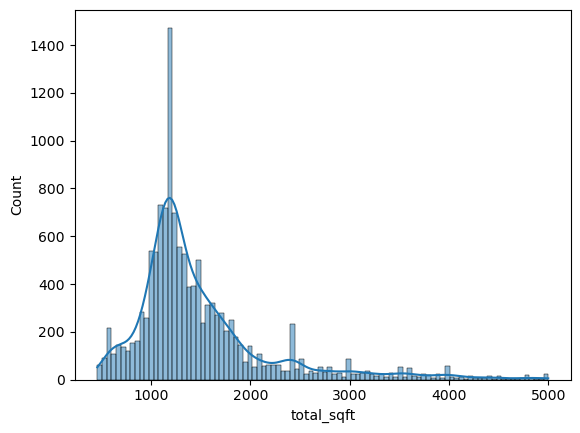

In [12]:
sns.histplot(df1["total_sqft"],kde=True)

<h2>Feature Engineering (<em>General Aspect</em>)</h2>

In [13]:
df1.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5343
total_sqft         0
bath              71
balcony          564
price              0
dtype: int64

In [14]:
## Insert A BHK Feature Derived From Size (BHK=Bedroom)

df1['bhk'] = df1['size'].str.split(" ").str[0].astype(float)

In [15]:
## Create A New Dataframe With Dropped Features

df2 = df1.drop(columns=["availability","size","society"])

In [16]:
## Fill Nan Values In Bath Feature With Median Of Bath  [Mode == Median]

df2['bath'] = df2['bath'].fillna(df2['bath'].median())

In [17]:
## Fill Nan Values In Balcony Feature With Median Of Balcony  [Mode == Median]

df2['balcony'] = df2['balcony'].fillna(df2['balcony'].median())

In [18]:
## Remove Probable Outliers W.R.T 99th Percentile From Bath Feature & Generate A New Dataframe

df3 = df2.loc[df2['bath'] <= df2['bath'].quantile(0.99)]

In [19]:
## Add A Price Per SQFT Feature

df3['price_per_sqft'] = (df3['price']*100000)/df3['total_sqft']

In [20]:
## Remove Probable Outliers W.R.T 99th Percentile From Price Per SQFT Feature & Generate A New Dataframe

df4 = df3.loc[df3['price_per_sqft'] <= df3['price_per_sqft'].quantile(0.99)]

In [21]:
## Fill Nan Values In BHK Feature With Mode Of BHK

mode_bhk = df4['bhk'].mode()[0]
df4['bhk'] = df4['bhk'].fillna(mode_bhk)

In [22]:
fig = px.violin(df4,y="balcony")
fig.show()

In [23]:
fig = px.imshow(df4.corr(numeric_only=True),text_auto=True)
fig.show()

<h2>Feature Engineering (<em>Business Aspect</em>)</h2>

In [24]:
## BHK-to-Square Foot Rule (Minimum 300 Sqft per BHK)

df5 = df4.loc[df4['total_sqft'] >= df4['bhk']*300]

In [25]:
## Bathroom-to-BHK Rule (Bathrooms should not exceed BHK + 2)

df6 = df5.loc[df5['bath'] <= df5['bhk']+2]

In [26]:
## Price Rule for Luxury vs Non-luxury Segmentation (Price > ₹3 crore OR price_per_sqft > ₹15,000)

df6['Segement'] = np.where((df6['price'] >= df6['price']*100000) | (df6['price_per_sqft'] >= 15000),'Premium','Regular')

In [27]:
## We fill the location with null value with most frequent value

freq_loc = df6['location'].mode()[0]
df6['location'] = df6['location'].fillna(freq_loc)

In [28]:
## Locality-Based Density Rule (cluster localities with < 10 listings)

location_groups = df6['location'].value_counts()
rare_locations = location_groups[location_groups < 10].index

df6['location_clean'] = df6['location'].replace(rare_locations,"Other")

In [29]:
## Create a new dataframe with dropped column

df7 = df6.drop(columns=["location","price_per_sqft"])

In [30]:
fig = px.violin(df7,y="total_sqft")
fig.show()

In [31]:
fig = px.imshow(df7.corr(numeric_only=True),text_auto=True)
fig.show()

<h2>Initialize Model Generation Process</h2>

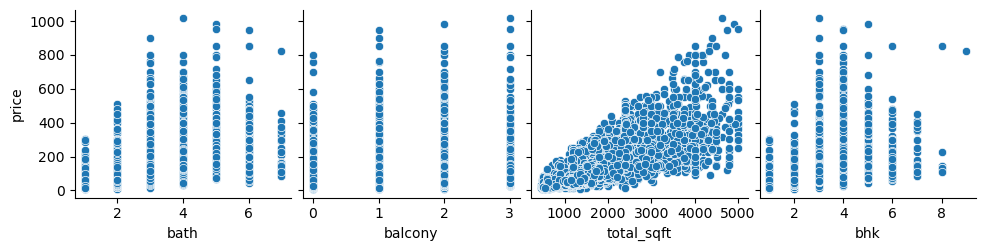

In [32]:
sns.pairplot(data=df7,x_vars=["bath","balcony","total_sqft","bhk"],y_vars=["price"])

In [62]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

ind_ft = []
for col in df7.columns.tolist():
    if col != "price":
        ind_ft.append(col)

x = df7[ind_ft]
y = df7["price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2025)

In [63]:
## Applying Target Encoder To Location_clean Feature

from category_encoders import TargetEncoder

te = TargetEncoder(cols=["location_clean"],smoothing=0.3)
x_train["location_te"] = te.fit_transform(x_train["location_clean"],y_train)
x_test["location_te"] = te.transform(x_test["location_clean"])

In [64]:
## Save Mapping Key & Value in a JSON format

import json

mapping_loc = x_train.groupby("location_clean")["location_te"].mean().to_dict()

file_path = r"F:\Udemy\Git\ML Portfolio\Streamlit Apps\Bangalore Housing Price App\Model\location_encoding.json"
with open(file_path,"w") as load:
    json.dump(mapping_loc,load)

In [65]:
## Drop The String Location Featuure
x_train = x_train.drop(columns="location_clean")
x_test = x_test.drop(columns="location_clean")

In [66]:
## Transformation Pipelines Using Grid Search CV

numeric_features = x_train.select_dtypes(include="number").columns.tolist()
categorical_features = x_train.select_dtypes(include="object").columns.tolist()

numerical_transformer = Pipeline(steps=[('scaler',StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)
    ],
    remainder='passthrough',
    n_jobs=-1
)

clf1 = RidgeCV()
clf2 = DecisionTreeRegressor(random_state=25)
clf3 = RandomForestRegressor(random_state=25)
clf4 = KNeighborsRegressor()
clf5 = GradientBoostingRegressor(random_state=25)
clf6 = SVR()

param1 = {}
param1['classifier__alphas'] = [0.1,0.5,1.0,2.5,5.0,7.5,10.0]
param1['classifier'] = [clf1]

param2 ={}
param2['classifier__max_depth'] = [5,10,15,20,25,None]
param2['classifier__min_samples_split'] = [2,5,10,15]
param2['classifier__min_samples_leaf'] = [1,2,5,10,15]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__n_estimators'] = [10,30,50,70,100]
param3['classifier__max_depth'] = [5,10,20,25,None]
param3['classifier__min_samples_split'] = [2,5,10,15]
param3['classifier__min_samples_leaf'] = [1,2,5,10,15]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__n_neighbors'] = [2,5,7,10,15]
param4['classifier__weights'] = ['uniform','distance']
param4['classifier__algorithm'] = ['ball_tree','kd_tree']
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__loss'] = ['squared_error','absolute_error','huber']
param5['classifier__learning_rate'] = [0.1,0.5,1.0,2.5,5.0]
param5['classifier__n_estimators'] = [10,30,50,100,150]
param5['classifier__min_samples_split'] = [2,5,10,15]
param5['classifier__min_samples_leaf'] = [1,2,5,10,15]
param5['classifier__max_depth'] = [2,3,5,7]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__kernel'] = ['linear','poly','rbf','sigmoid']
param6['classifier__epsilon'] = [0.1,0.25,0.5,0.7]
param6['classifier__C'] = [1.0,2.5,5.0,7.5,10.0]
param6['classifier'] = [clf6]

pipeline = Pipeline(steps=[('preprocessor',preprocessor),('classifier',clf1)])
params = [param1,param2,param3,param4,param5,param6]

gs = GridSearchCV(pipeline,params,cv=3,n_jobs=-1,scoring='r2')

gs.fit(x_train,y_train)

E:\Conda\Lib\site-packages\sklearn\model_selection\_search.py:1146: RuntimeWarning:

overflow encountered in square



,estimator,"Pipeline(step..., RidgeCV())])"
,param_grid,"[{'classifier': [RidgeCV()], 'classifier__alphas': [0.1, 0.5, ...]}, {'classifier': [DecisionTreeR...ndom_state=25)], 'classifier__max_depth': [5, 10, ...], 'classifier__min_samples_leaf': [1, 2, ...], 'classifier__min_samples_split': [2, 5, ...]}, ...]"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [86]:
gs.best_params_

{'classifier': GradientBoostingRegressor(random_state=25),
 'classifier__learning_rate': 0.1,
 'classifier__loss': 'squared_error',
 'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 15,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 150}

In [72]:
## Save The Model In A Pickle Format

file_path = r"F:\Udemy\Git\ML Portfolio\Streamlit Apps\Bangalore Housing Price App\Model\bglr_model.pkl"
with open(file_path,"wb") as load:
    pickle.dump(gs,load)

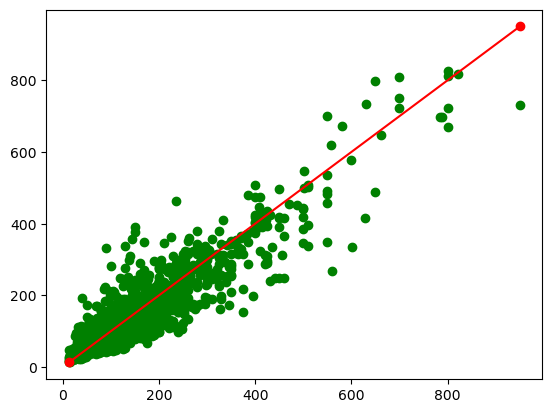

In [73]:
plt.scatter(y_test,gs.predict(x_test),color="g")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"or-")
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse = mean_squared_error(y_test,gs.predict(x_test))
mae = mean_absolute_error(y_test,gs.predict(x_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test,gs.predict(x_test))
adjusted_r2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-len(x.columns)-1)

In [75]:
mse,mae,rmse,r2,adjusted_r2

(1145.8890696976837,
 20.112784662402632,
 33.850983289967864,
 0.8611575903075147,
 0.8608914630162092)

In [81]:
feature_cols = x_train.columns.tolist()
new_data_point = pd.DataFrame([["Super built-up Area",1000,2,1,3,"Regular",69.636364]],columns=feature_cols)
gs.predict(new_data_point)

array([53.94712194])

In [ ]:
X_train_processed_np = gs.named_steps['preprocessor'].transform(x_train)

# B. Get the correct feature names in the correct order
feature_names_out = gs.named_steps['preprocessor'].get_feature_names_out()

# C. Convert to a Pandas DataFrame for easy viewing
X_train_processed_df = pd.DataFrame(X_train_processed_np, columns=feature_names_out, index=x_train.index)

In [84]:
# ## Transformation Pipelines Manual Way  (Did First To Check The Model Performance In A layman Way)

# numeric_features = x_train.select_dtypes(include="number").columns.tolist()
# categorical_features = x_train.select_dtypes(include="object").columns.tolist()

# numerical_transformer = Pipeline(steps=[('scaler',StandardScaler())])
# categorical_transformer = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num',numerical_transformer,numeric_features),
#         ('cat',categorical_transformer,categorical_features)
#     ],
#     remainder='passthrough',
#     n_jobs=-1
# )

# models = {
#     "Linear Regression":LinearRegression(),
#     "Ridge Regression":Ridge(random_state=2025),
#     "Random Forest":RandomForestRegressor(n_estimators=50,random_state=2025),
#     "Gradient Boosting":GradientBoostingRegressor(n_estimators=50,random_state=2025)
# }

# results = {}
# cv = KFold(n_splits=5,shuffle=True,random_state=2025)
# scoring_metric = 'r2'

# print(f"Starting cross-validation using {scoring_metric} metric:\n")

# for name,model in models.items():
    
#     model_pipeline = Pipeline(steps=[
#         ('preprocessor',preprocessor),
#         ('regressor',model)
#     ])

#     cv_scores = cross_val_score(model_pipeline,x_train,y_train,cv=cv,n_jobs=-1,scoring=scoring_metric)

#     results[name] = {
#         'scores':cv_scores,
#         'mean_score':np.mean(cv_scores),
#         'std_dev':np.std(cv_scores)
#     }

#     print(f"Model :{name:20} Mean R2 Score: {results[name]["mean_score"]:.2f}")

# model_pipeline.fit(x_train,y_train)